<a href="https://colab.research.google.com/github/sweyy/sweyy/blob/main/Car_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from imblearn.over_sampling import SMOTE

color = ['#0D3B66', '#FFC914','#FF8552','#F4D35E','#7C9885','#F95738','#2C363F','#C0C0C0','#BFB8AD','#5E5D5C']

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# functions

In [3]:
def plot_count(x,hue,title):
    plt.figure(figsize=(18,4))
    sns.countplot(x=df[x], hue=df[hue], palette=color)
    plt.title(f'{title} {x} by {hue}', fontsize=16, fontweight='bold')
    plt.tick_params(axis='x', labelrotation=90, labelsize=12)
    plt.xlabel(x, fontsize=14)
    return plt.show()



def plot_bar(x,y,title):
    plt.figure(figsize=(18,4))
    sns.barplot(x=df[x], y=df[y], palette=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()


def plot_scatter(x,y,title):
    plt.figure(figsize=(18,4))
    sns.scatterplot(x=df[x], y=df[y], palette=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()

# loading data

In [4]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.duplicated().sum()

2

# transformation

In [9]:
def text_upper(text):
    text = text.str.upper()
    return text

cat = df.select_dtypes(include='O')
for c in cat:
    df[c] = text_upper(df[c])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0


In [10]:
colunas = df['Car_Name'].str.split(' ',1, expand=True)
df['Names'] = colunas[0]

<ipython-input-10-747c41dd6b31>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunas = df['Car_Name'].str.split(' ',1, expand=True)


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
data = df.drop('Car_Name',axis=1)
data = data[data['Owner'] !=3]

# graphic

<ipython-input-13-f94f9259900d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

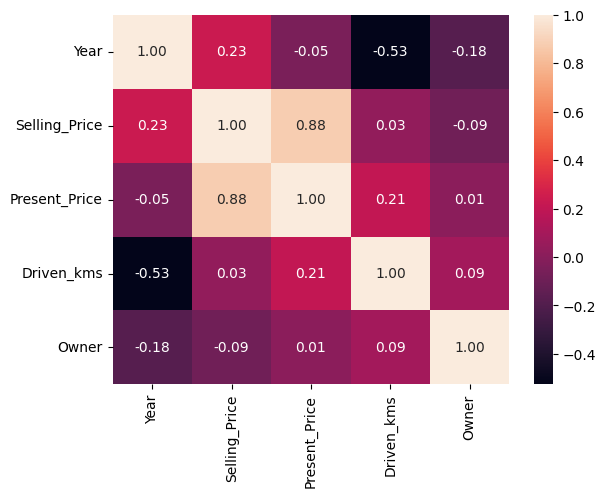

In [13]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

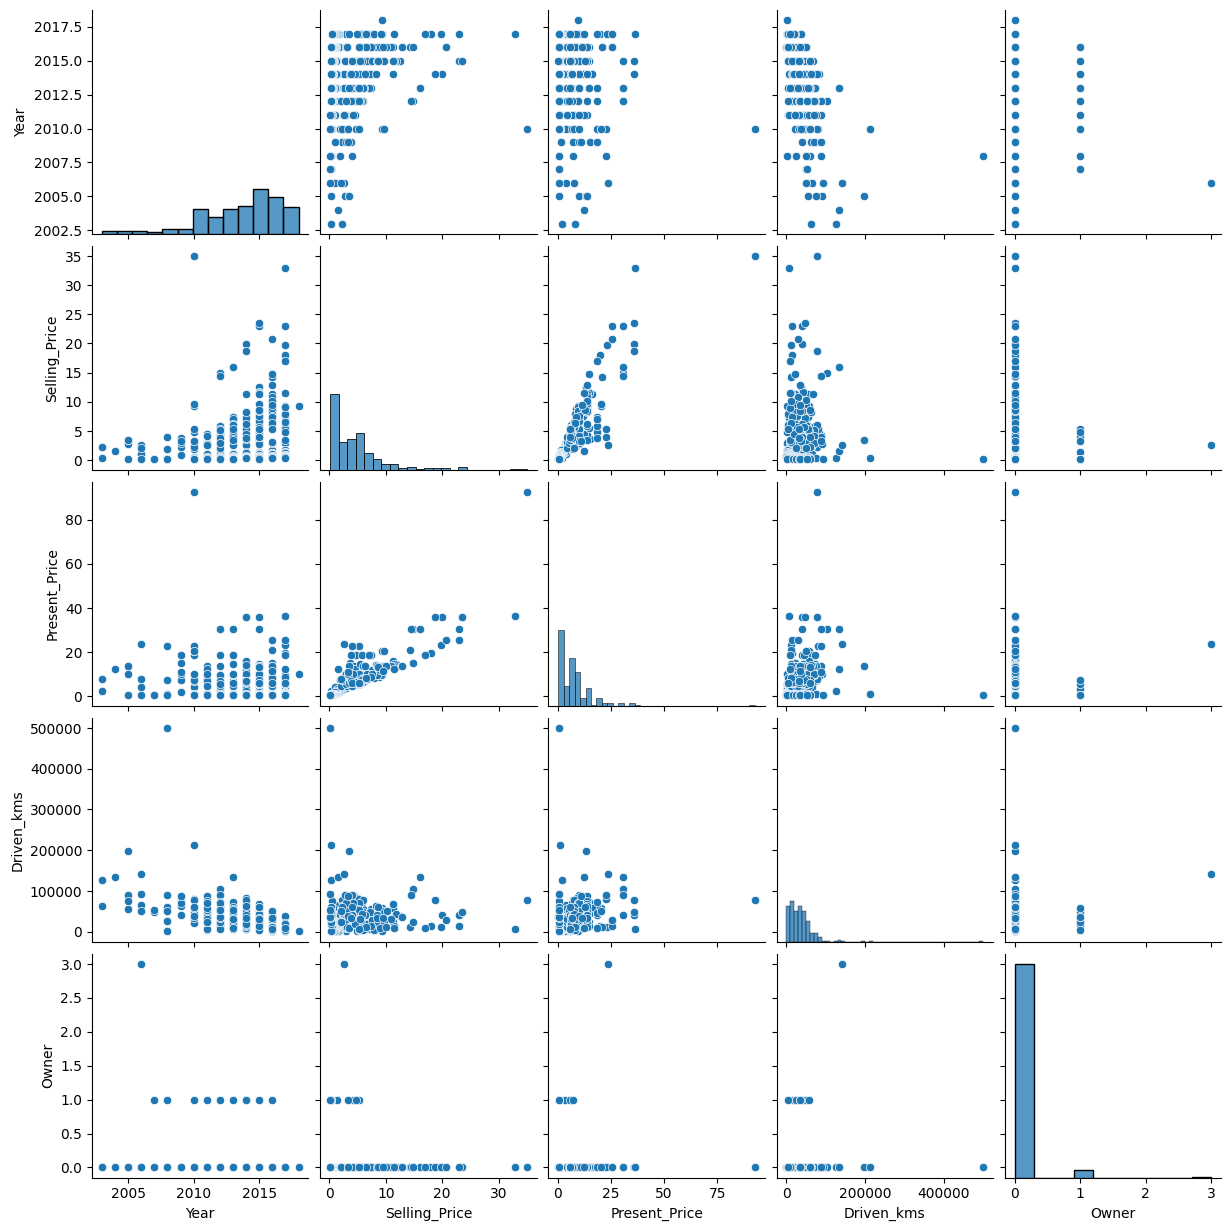

In [14]:
sns.pairplot(df)
plt.show()

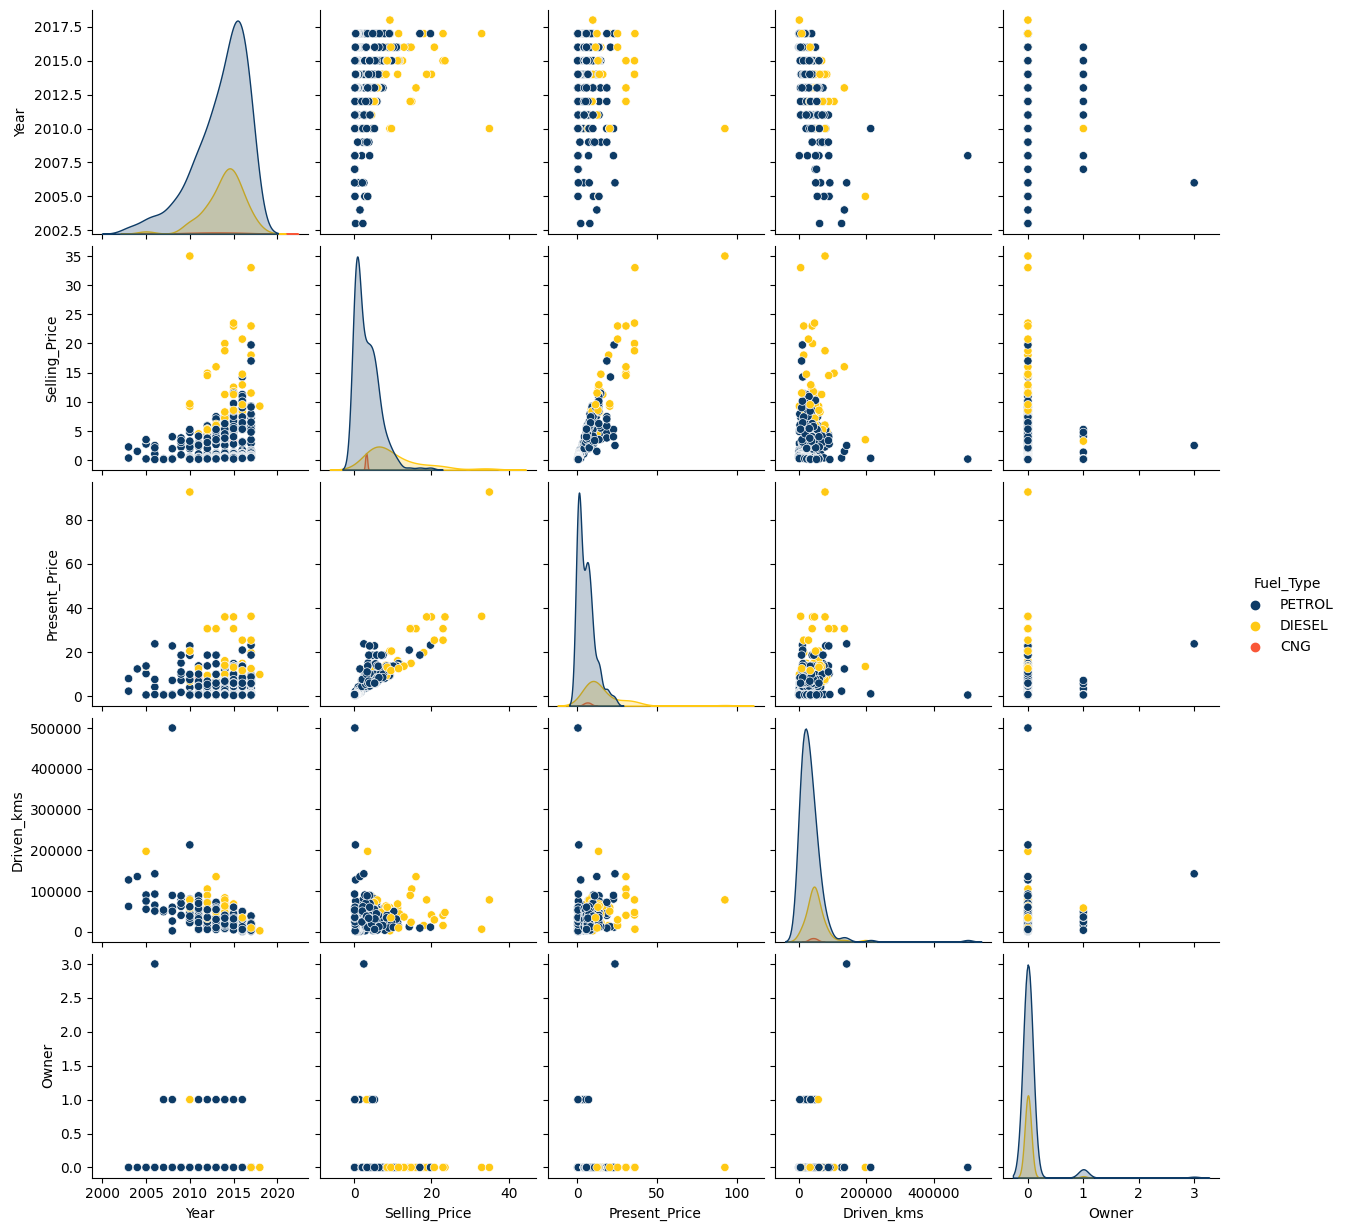

In [15]:
sns.pairplot(df, hue='Fuel_Type',palette=['#0D3B66', '#FFC914','#F95738'])
plt.show()

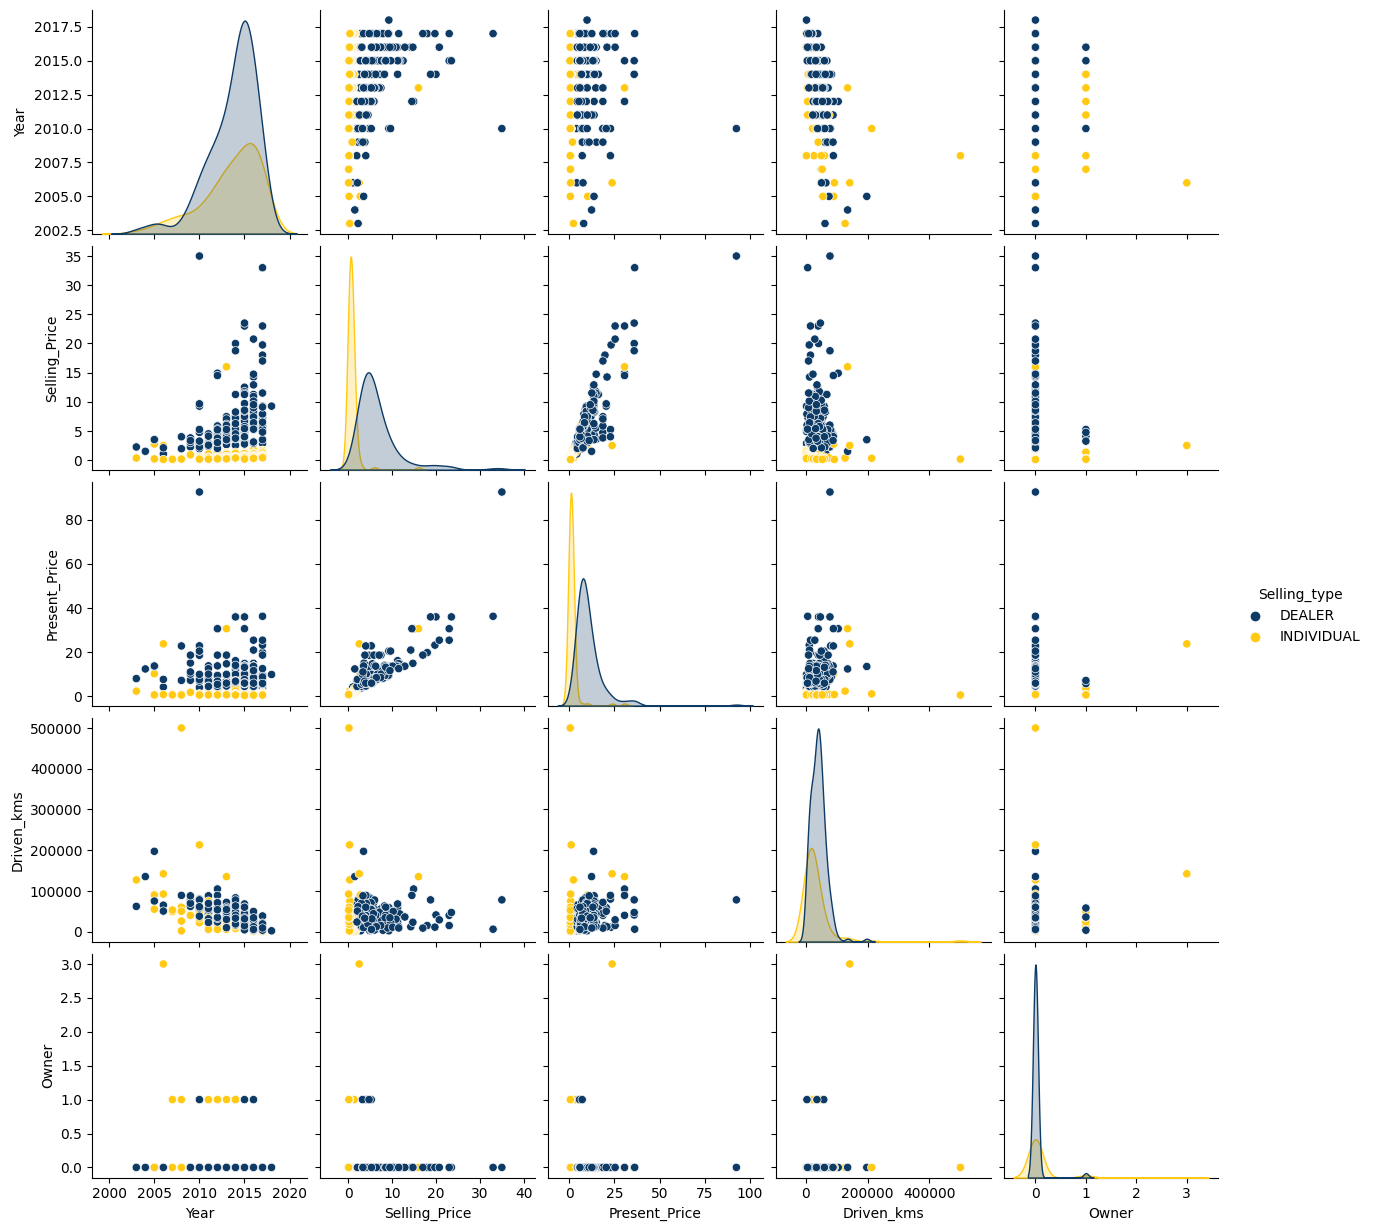

In [16]:
sns.pairplot(df, hue='Selling_type',palette=['#0D3B66', '#FFC914'])
plt.show()

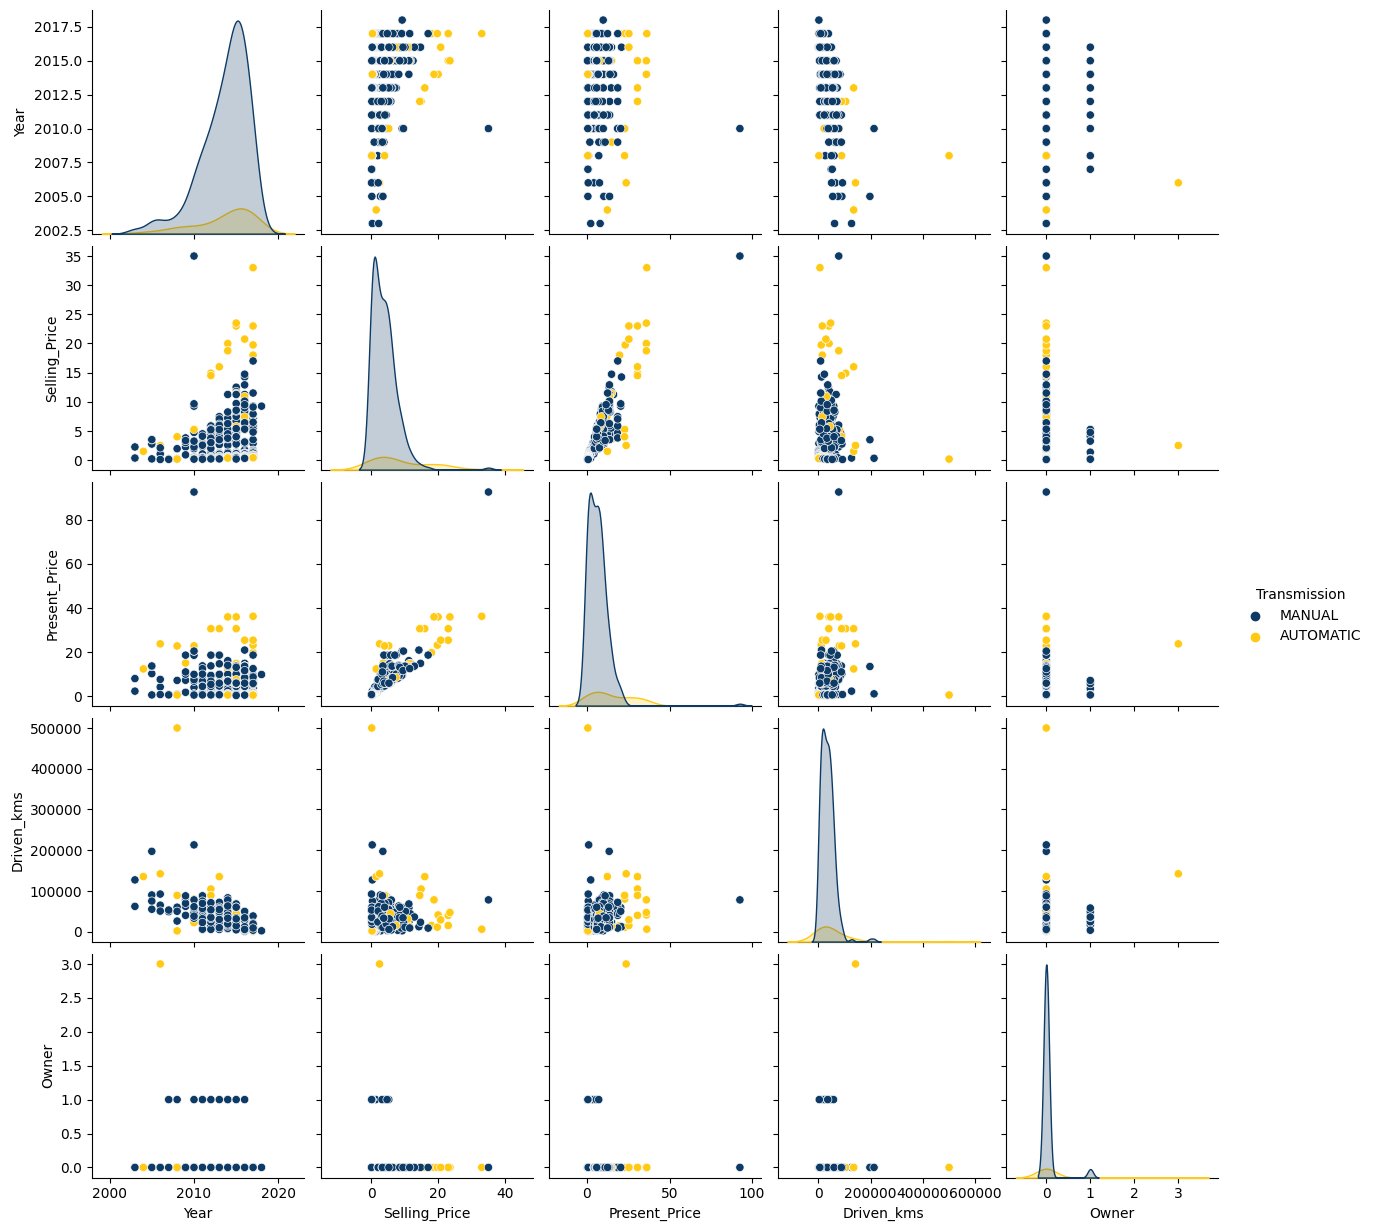

In [17]:
sns.pairplot(df, hue='Transmission',palette=['#0D3B66', '#FFC914'])
plt.show()

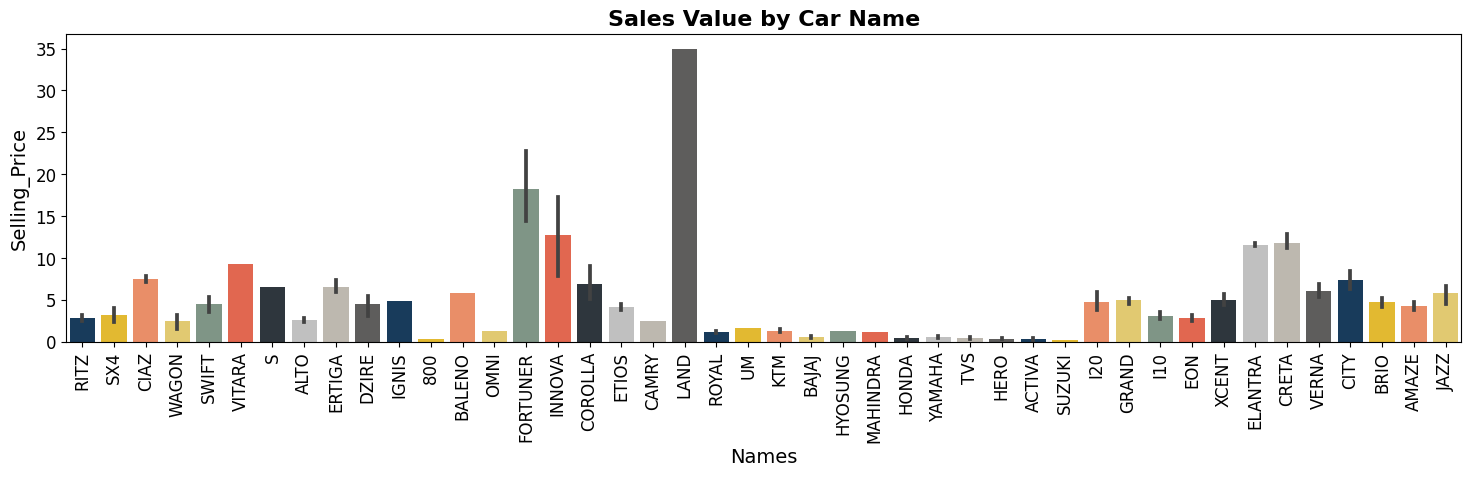

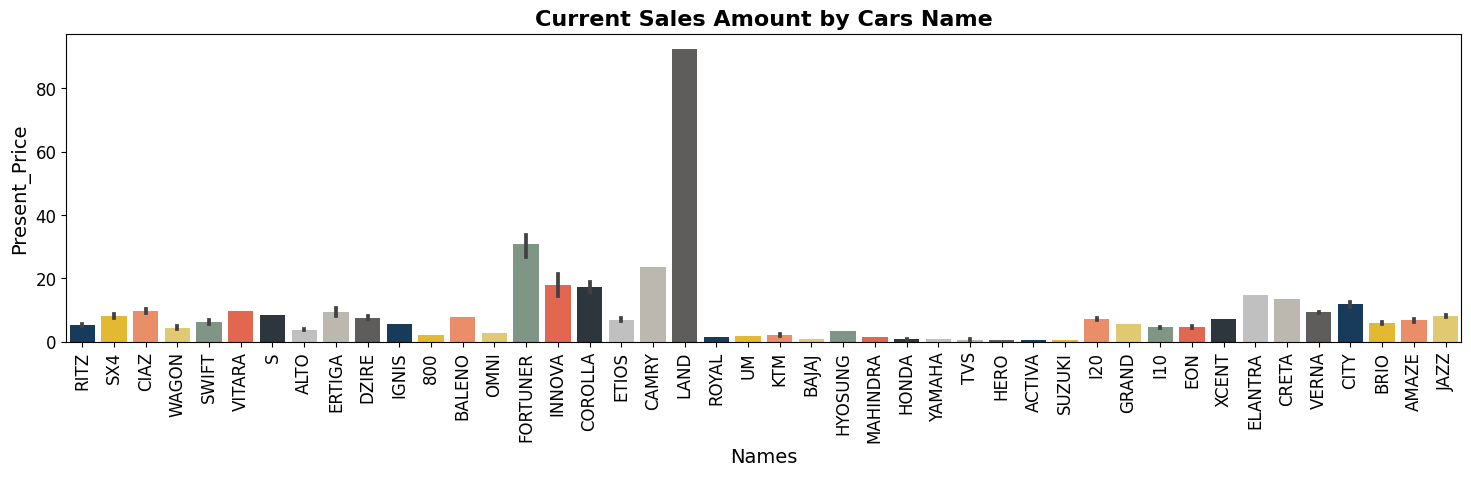

In [18]:
plot_bar('Names','Selling_Price','Sales Value by Car Name')
plot_bar('Names','Present_Price','Current Sales Amount by Cars Name')

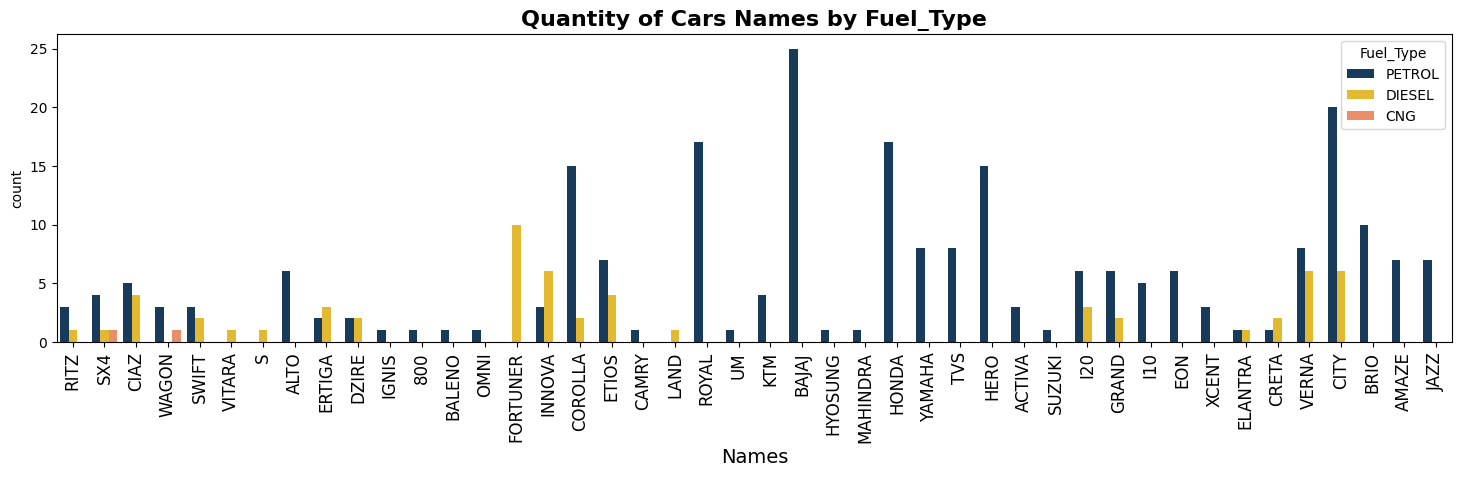

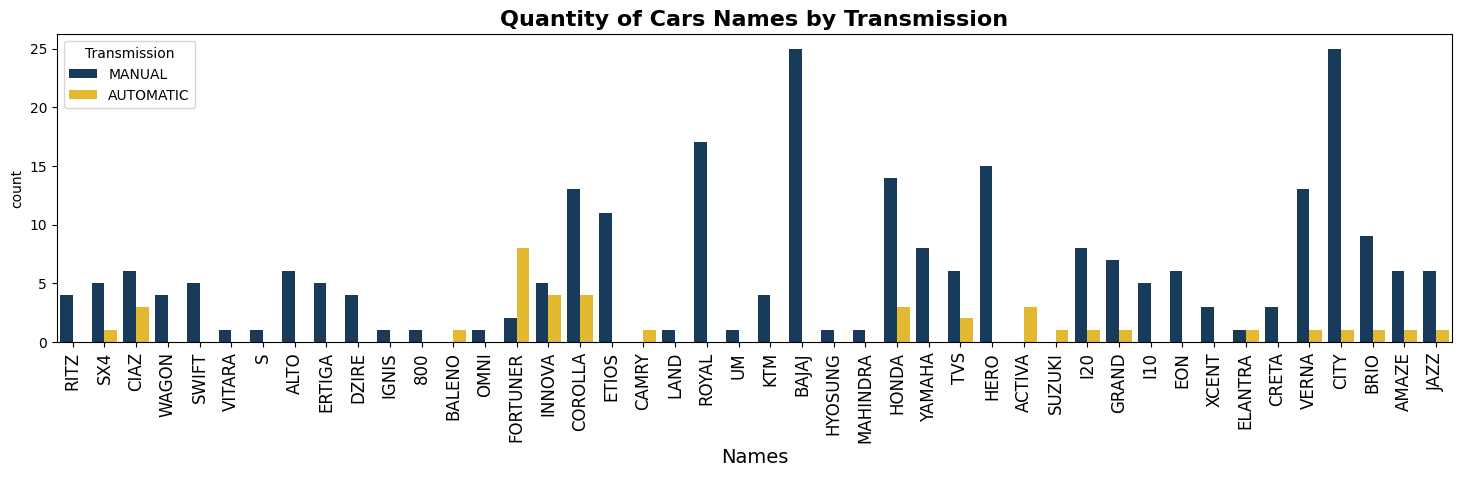

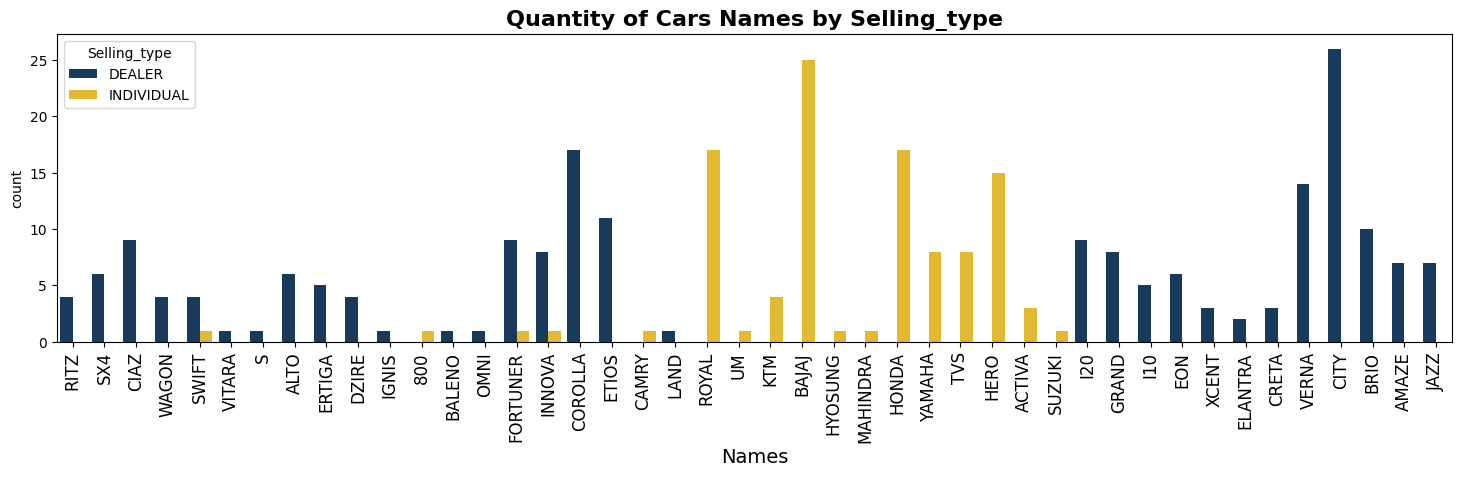

In [19]:
plot_count('Names','Fuel_Type','Quantity of Cars')
plot_count('Names','Transmission','Quantity of Cars')
plot_count('Names','Selling_type','Quantity of Cars')

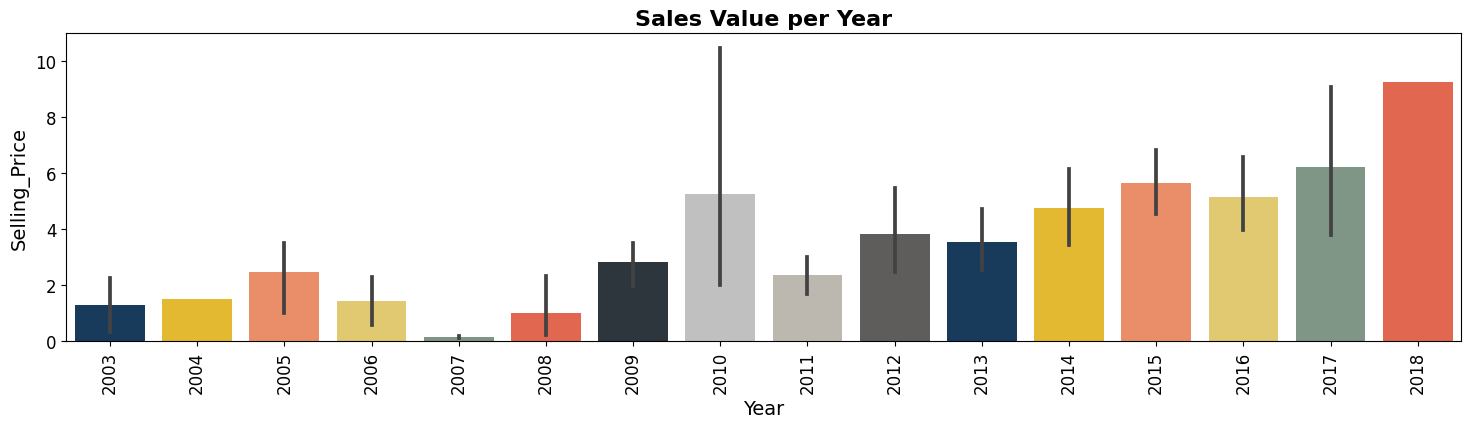

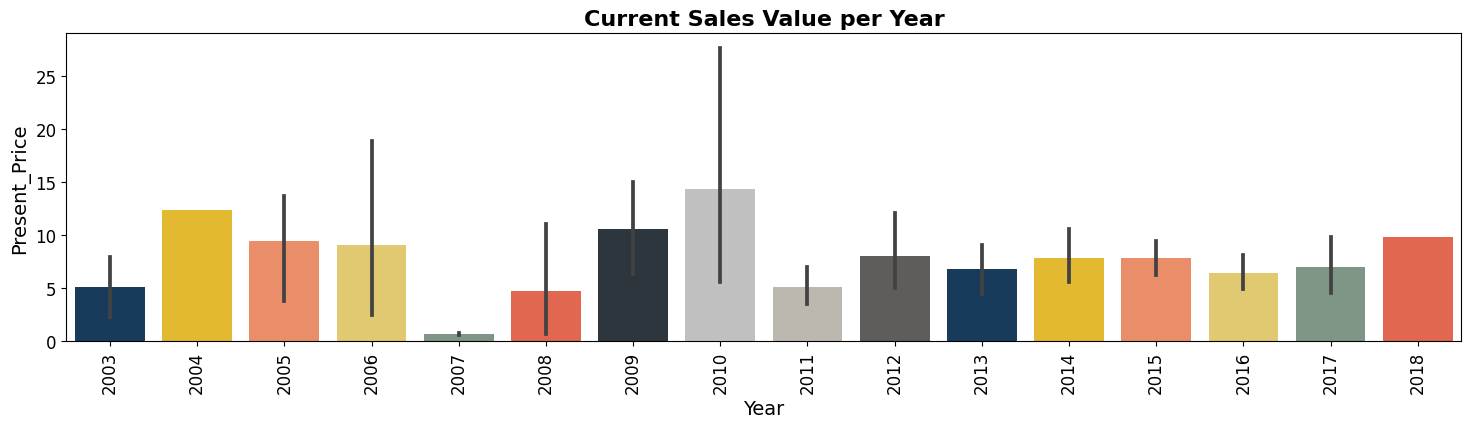

In [20]:
plot_bar('Year','Selling_Price','Sales Value per Year')
plot_bar('Year','Present_Price','Current Sales Value per Year')

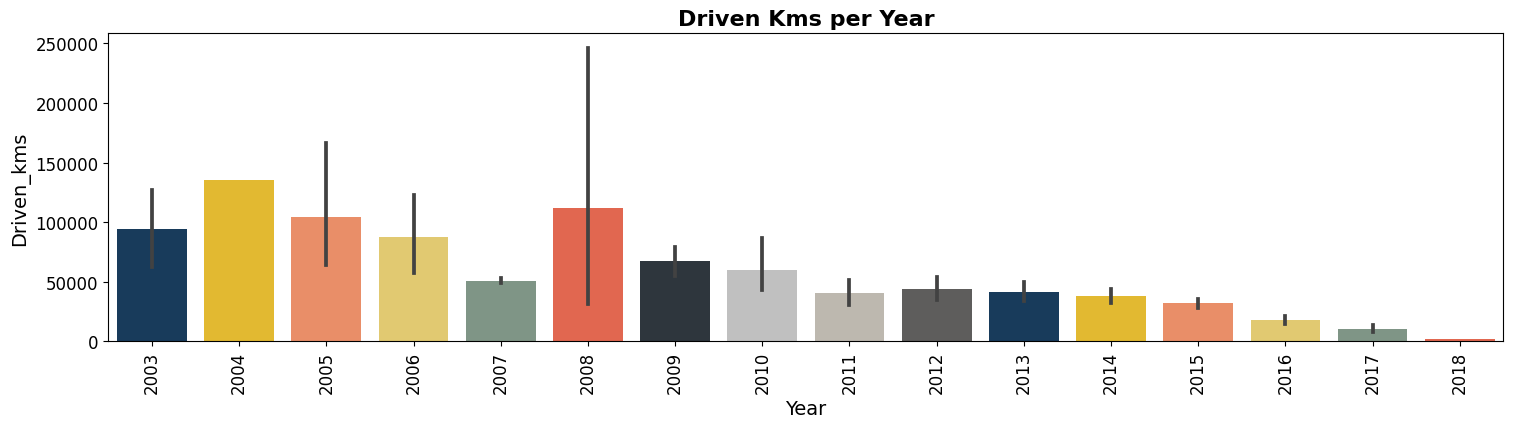

In [21]:
plot_bar('Year','Driven_kms','Driven Kms per Year')

<ipython-input-3-e5d647882403>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x], y=df[y], palette=color)


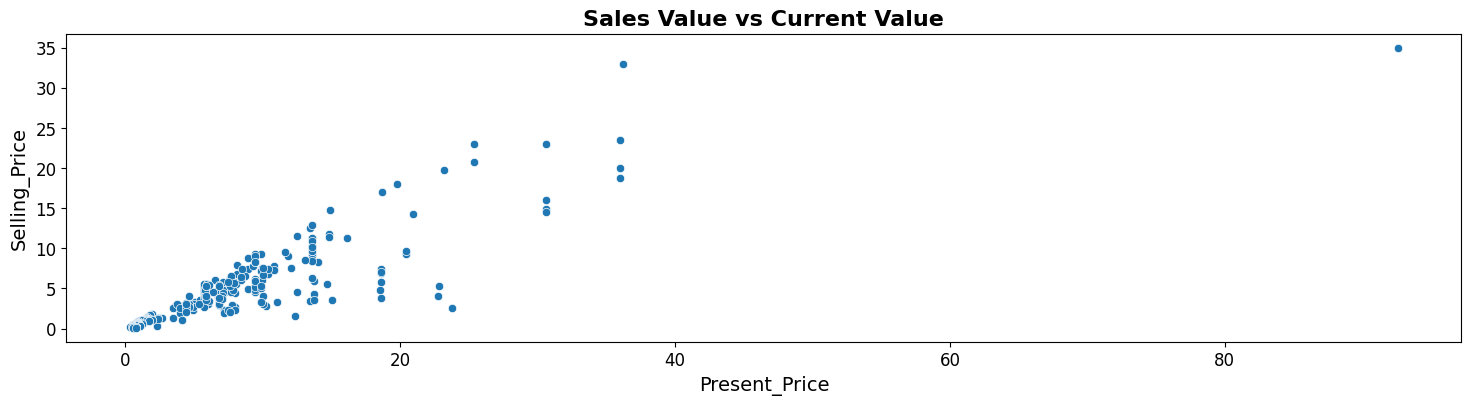

<ipython-input-3-e5d647882403>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x], y=df[y], palette=color)


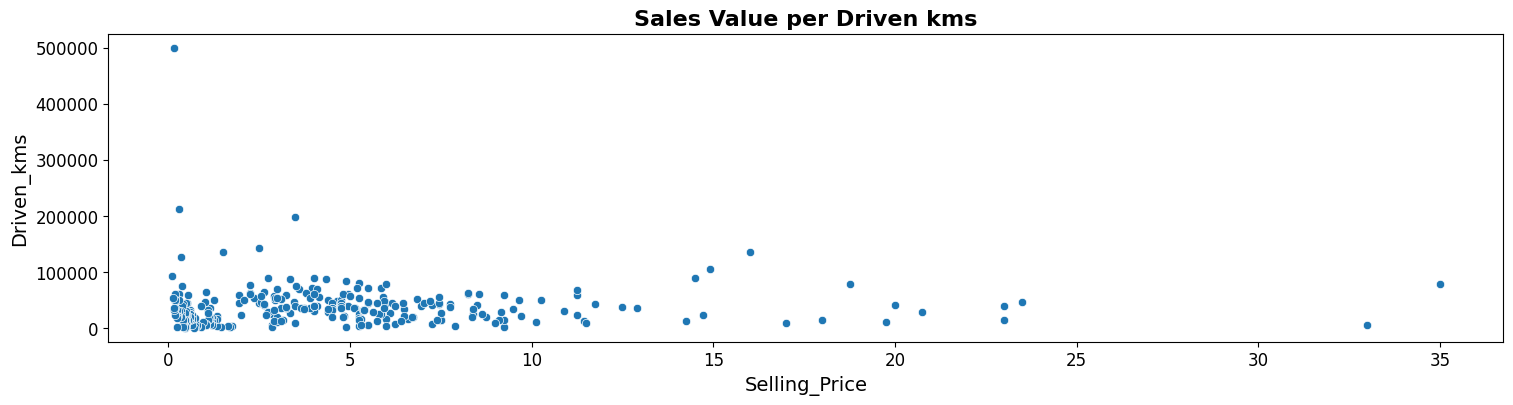

<ipython-input-3-e5d647882403>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x], y=df[y], palette=color)


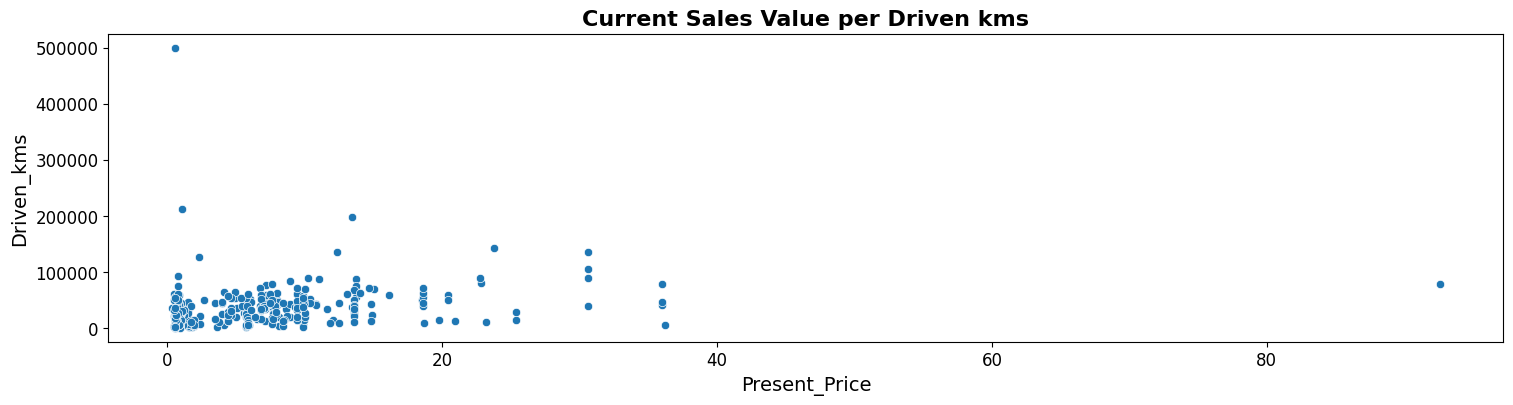

In [22]:
plot_scatter('Present_Price','Selling_Price','Sales Value vs Current Value')
plot_scatter('Selling_Price','Driven_kms','Sales Value per Driven kms')
plot_scatter('Present_Price', 'Driven_kms','Current Sales Value per Driven kms')

# Models

In [23]:
cat = data.select_dtypes(include='O')

encode = list(cat)

le = LabelEncoder()
data[encode] = data[encode].apply(lambda col: le.fit_transform(col))
data[encode]

,Fuel_Type,Selling_type,Transmission,Names
0,2,0,1,30
1,1,0,1,35
2,2,0,1,7
3,2,0,1,40
4,1,0,1,34
...,...,...,...,...
296,1,0,1,8
297,2,0,1,6
298,2,0,1,8
299,1,0,1,8


In [24]:
y = data.Owner
x = data.drop('Owner',axis=1)
print('ok')

ok


<Axes: ylabel='Owner'>

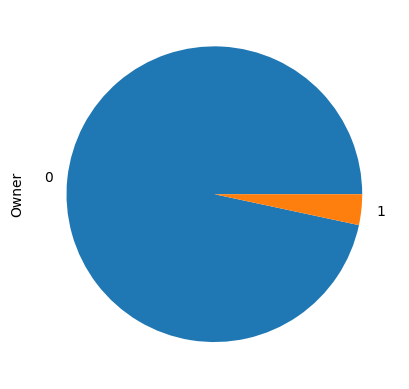

In [25]:
y.value_counts().plot.pie()

In [26]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('ok')

ok


<Axes: ylabel='Owner'>

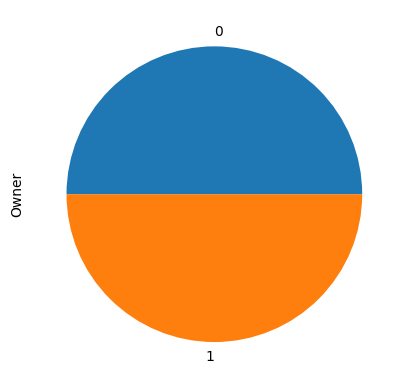

In [28]:
smote = SMOTE()

x_train, y_train = smote.fit_resample(x_train, y_train)

y_train.value_counts().plot.pie()

In [29]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print('ok')

ok


### LinearRegression

In [30]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test, y_test)

0.4

In [31]:
score = cross_val_score(lr, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.73913043 0.80434783 0.80434783 0.75824176 0.83516484]
----------------------------------------
SCORE: 0.788246536072623


### Random Forest

In [32]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
forest.score(x_test, y_test)

0.7

In [33]:
score = cross_val_score(forest, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.91304348 0.94565217 0.94565217 0.94505495 0.97802198]
----------------------------------------
SCORE: 0.9454849498327759


### GradientBoosting

In [34]:
grade = GradientBoostingClassifier()
grade.fit(x_train,y_train)
grade.score(x_test, y_test)

0.5666666666666667

In [35]:
score = cross_val_score(grade, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.86956522 0.95652174 0.93478261 0.93406593 0.93406593]
----------------------------------------
SCORE: 0.925800286669852


### ExtraTrees

In [36]:
extra = ExtraTreesClassifier()
extra.fit(x_train,y_train)
extra.score(x_test, y_test)

0.6833333333333333

In [37]:
score = cross_val_score(extra, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.91304348 0.95652174 0.95652174 0.96703297 0.97802198]
SCORE: 0.9542283803153369
